In [1]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt

from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

from msvit4od import add_vit_config

import warnings
warnings.simplefilter('ignore')

- Download an image from the COCO dataset

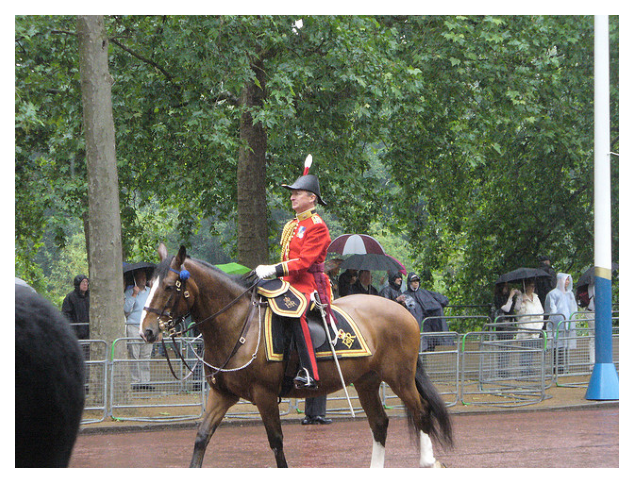

In [2]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")

fig, ax = plt.subplots(dpi=150)
ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
ax.axis('off');

- Create a detectron2 config and detectron2 `DefaultPredictor` to run inference on this image

In [3]:
cfg = get_cfg()
add_vit_config(cfg)
cfg.merge_from_file("../configs/msvit_maskrcnn_fpn_3xms_large_sparse.yaml")

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 # set threshold for this model
cfg.MODEL.WEIGHTS = "../imagenet/vilbase/maskrcnn3x/model_final.pth"

predictor = DefaultPredictor(cfg)
outputs = predictor(im)

- Look at the outputs.

In [4]:
print(outputs['instances'].pred_classes)
print(outputs['instances'].pred_boxes)

tensor([17,  0,  0,  0,  0,  0,  0,  0, 25, 25,  0,  0,  0,  0, 25,  0,  0, 25,
        25,  0,  0], device='cuda:0')
Boxes(tensor([[1.3045e+02, 2.4898e+02, 4.6964e+02, 4.7603e+02],
        [5.5972e+02, 2.7223e+02, 5.9742e+02, 3.8309e+02],
        [2.5355e+02, 1.5999e+02, 3.4151e+02, 4.0614e+02],
        [1.1494e+02, 2.6702e+02, 1.4751e+02, 3.9821e+02],
        [5.0347e+01, 2.7609e+02, 7.9830e+01, 3.4616e+02],
        [3.8596e+02, 2.7121e+02, 4.1545e+02, 3.0743e+02],
        [4.1254e+02, 2.7221e+02, 4.6123e+02, 3.5864e+02],
        [3.5413e+02, 2.6945e+02, 3.8769e+02, 2.9839e+02],
        [5.0843e+02, 2.6601e+02, 5.7306e+02, 2.9502e+02],
        [3.4075e+02, 2.5172e+02, 4.1523e+02, 2.7468e+02],
        [5.2699e+02, 2.8076e+02, 5.6272e+02, 3.9011e+02],
        [3.0003e-01, 2.7917e+02, 7.4964e+01, 4.7604e+02],
        [5.0800e+02, 2.8251e+02, 5.3628e+02, 3.9135e+02],
        [3.4293e+02, 2.6814e+02, 3.6268e+02, 2.9869e+02],
        [3.2909e+02, 2.3131e+02, 3.9501e+02, 2.5586e+02],
      

- Use `Visualizer` to draw the predictions on the image

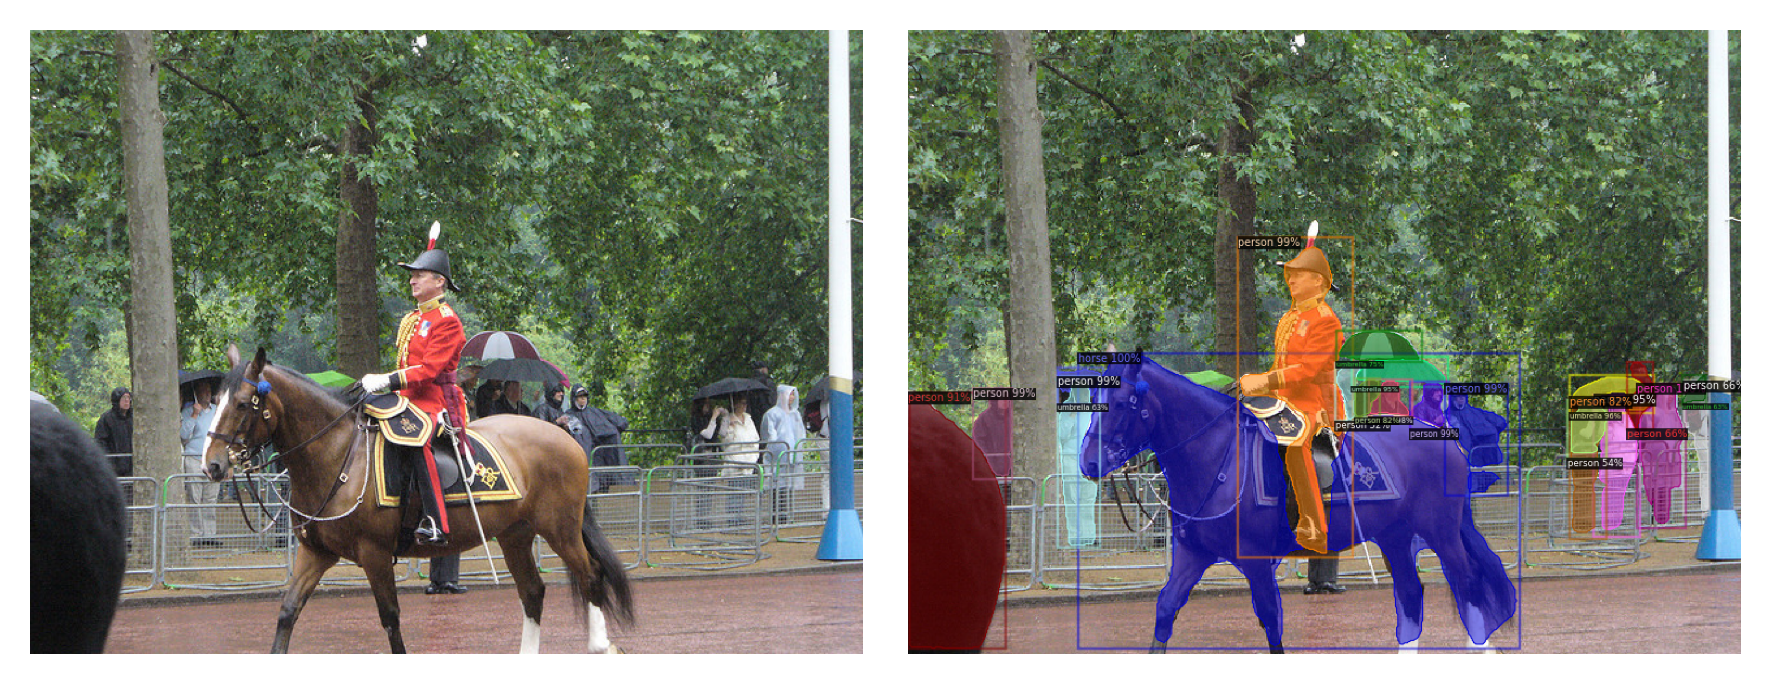

In [5]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

fig, axes = plt.subplots(ncols=2, dpi=300)

axes[0].axis('off')
axes[1].axis('off')

axes[0].imshow(im[:, :, ::-1])
axes[1].imshow(out.get_image())

plt.tight_layout()